In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

In [2]:
df = pd.read_csv("dataset.csv").drop("id", axis=1)

df.head()

,target,sample_type,continuous_0,categorical_0,categorical_1,categorical_2,categorical_3,categorical_4,categorical_5,categorical_6,...,continuous_660,continuous_661,continuous_662,continuous_663,continuous_664,continuous_665,continuous_666,categorical_15,categorical_16,continuous_667
0,good,dev,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,315.000000,315.00,315.00,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,good,dev,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,155.000000,155.00,155.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,good,dev,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,...,163.125000,162.15,164.10,0.0,0.0,0.0,0.0,1.0,1.0,NaN
3,good,dev,1.0,1.0,2.0,2.0,2.0,3.0,0.0,0.0,...,107.226666,75.00,153.68,0.0,0.0,0.0,0.0,2.0,2.0,0.0
4,bad,dev,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,157.150000,155.30,158.45,138.0,46.0,0.0,120.0,3.0,1.0,NaN


In [3]:
columns = list(df)
columns

['target',
 'sample_type',
 'continuous_0',
 'categorical_0',
 'categorical_1',
 'categorical_2',
 'categorical_3',
 'categorical_4',
 'categorical_5',
 'categorical_6',
 'categorical_7',
 'categorical_8',
 'continuous_1',
 'continuous_2',
 'continuous_3',
 'continuous_4',
 'continuous_5',
 'continuous_6',
 'continuous_7',
 'continuous_8',
 'continuous_9',
 'continuous_10',
 'continuous_11',
 'continuous_12',
 'continuous_13',
 'continuous_14',
 'continuous_15',
 'continuous_16',
 'continuous_17',
 'continuous_18',
 'continuous_19',
 'continuous_20',
 'continuous_21',
 'continuous_22',
 'continuous_23',
 'continuous_24',
 'continuous_25',
 'continuous_26',
 'continuous_27',
 'continuous_28',
 'continuous_29',
 'continuous_30',
 'continuous_31',
 'continuous_32',
 'continuous_33',
 'continuous_34',
 'continuous_35',
 'continuous_36',
 'continuous_37',
 'continuous_38',
 'continuous_39',
 'continuous_40',
 'continuous_41',
 'continuous_42',
 'continuous_43',
 'continuous_44',
 'continuou

In [4]:
ROWS = df.shape[0]
COLS = df.shape[1]

df.info(memory_usage=False, show_counts=False)

Rows number - 31498
Cols number - 687
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31498 entries, 0 to 31497
Columns: 687 entries, target to continuous_667
dtypes: float64(685), object(2)

## Categorical values analysis

In [5]:
notna_df = df.copy()
notna_df.fillna(0, inplace=True)

In [6]:
def get_categorical_values(df: pd.DataFrame, col_name: str) -> set:
    values = set()

    for value in df[col_name]:
        values.add(value)
    
    return values

In [7]:
categoricals = list(filter(lambda x: x.startswith("categorical_"), columns)) + ["target", "sample_type"]
print(f"Number of categorical columns {len(categoricals)}")
categoricals

Number of categorical columns 19


['categorical_0',
 'categorical_1',
 'categorical_2',
 'categorical_3',
 'categorical_4',
 'categorical_5',
 'categorical_6',
 'categorical_7',
 'categorical_8',
 'categorical_9',
 'categorical_10',
 'categorical_11',
 'categorical_12',
 'categorical_13',
 'categorical_14',
 'categorical_15',
 'categorical_16',
 'target',
 'sample_type']

In [8]:
categorical_values = {"name": [], "values": [], "n_uniques": []}
for col_name in categoricals:
    values = get_categorical_values(notna_df, col_name)
    categorical_values["name"].append(col_name)
    categorical_values["values"].append(values)
    categorical_values["n_uniques"].append(len(values))

categoricals_df = pd.DataFrame.from_dict(categorical_values)
categoricals_df

,name,values,n_uniques
0,categorical_0,"{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}",8
1,categorical_1,"{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",27
2,categorical_2,"{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",27
3,categorical_3,"{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",27
4,categorical_4,"{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",27
5,categorical_5,"{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}",6
6,categorical_6,"{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}",6
7,categorical_7,"{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}",6
8,categorical_8,"{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}",6
9,categorical_9,"{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0}",7


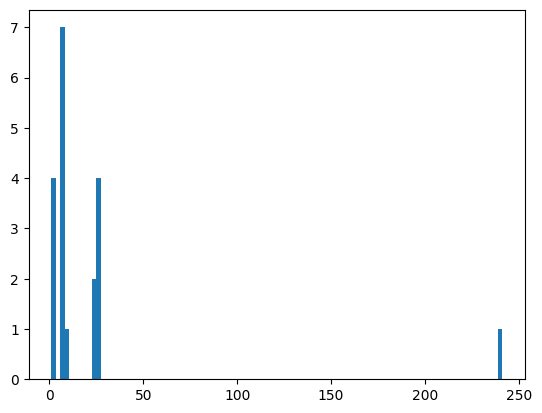

In [9]:
plt.hist(categoricals_df["n_uniques"], bins=100)
plt.show()

In [10]:
empty_categoricals = categoricals_df[categoricals_df["n_uniques"] == 1]["name"].to_list()
empty_categoricals

['categorical_11', 'categorical_14']

### Is target value balanced?

In [11]:
positive_count = df["target"].value_counts()["good"]
negative_count = df["target"].value_counts()["bad"]

positive_part = positive_count / (positive_count + negative_count)
negative_part = negative_count / (positive_count + negative_count)

print(f"Number of \"good\" occurances - {positive_count}")
print(f"Number of \"bad\" occurances - {negative_count}")
print(f"Part of \"good\" occurances - {positive_part: .2f}")
print(f"Part of \"bad\" occurances - {negative_part: .2f}")

Number of "good" occurances - 28998
Number of "bad" occurances - 2500
Part of "good" occurances -  0.92
Part of "bad" occurances -  0.08


### Sample type analysis

In [12]:
dev_count = df["sample_type"].value_counts()["dev"]
test_count = df["sample_type"].value_counts()["test"]
valid_count = df["sample_type"].value_counts()["valid"]

size = len(df)

print(f"| Dev   | Number {dev_count} \t| Part {dev_count / size: .2f}\t|")
print(f"| Test  | Number {test_count}\t| Part {test_count / size: .2f}\t|")
print(f"| Valid | Number {valid_count}\t| Part {valid_count / size: .2f}\t|")


| Dev   | Number 19368 	| Part  0.61	|
| Test  | Number 6130	| Part  0.19	|
| Valid | Number 6000	| Part  0.19	|


## Continuous columns

In [13]:
contin_cols = list(filter(lambda x: x.startswith("continuous_"), columns))
contin_cols

['continuous_0',
 'continuous_1',
 'continuous_2',
 'continuous_3',
 'continuous_4',
 'continuous_5',
 'continuous_6',
 'continuous_7',
 'continuous_8',
 'continuous_9',
 'continuous_10',
 'continuous_11',
 'continuous_12',
 'continuous_13',
 'continuous_14',
 'continuous_15',
 'continuous_16',
 'continuous_17',
 'continuous_18',
 'continuous_19',
 'continuous_20',
 'continuous_21',
 'continuous_22',
 'continuous_23',
 'continuous_24',
 'continuous_25',
 'continuous_26',
 'continuous_27',
 'continuous_28',
 'continuous_29',
 'continuous_30',
 'continuous_31',
 'continuous_32',
 'continuous_33',
 'continuous_34',
 'continuous_35',
 'continuous_36',
 'continuous_37',
 'continuous_38',
 'continuous_39',
 'continuous_40',
 'continuous_41',
 'continuous_42',
 'continuous_43',
 'continuous_44',
 'continuous_45',
 'continuous_46',
 'continuous_47',
 'continuous_48',
 'continuous_49',
 'continuous_50',
 'continuous_51',
 'continuous_52',
 'continuous_53',
 'continuous_54',
 'continuous_55',
 '

In [14]:
def get_stats(df: pd.DataFrame, col_name: str) -> tuple[float]:
    """Returns tuple of min, max, mean, std"""
    mean = df[col_name].mean()
    std = df[col_name].std()
    min = df[col_name].min()
    max = df[col_name].max()
    
    return min, max, mean, std

In [15]:
contins = {"name": [], "mean": [], "std": [], "min": [], "max": []}

for col_name in contin_cols:
    min_val, max_val, mean, std = get_stats(df, col_name)
    contins["name"].append(col_name)
    contins["mean"].append(mean)
    contins["std"].append(std)
    contins["max"].append(max_val)
    contins["min"].append(min_val)

contins_df = pd.DataFrame.from_dict(contins)
contins_df

,name,mean,std,min,max
0,continuous_0,0.983777,0.126335,0.0,1.0
1,continuous_1,145865.264902,161445.404412,0.0,1069005.0
2,continuous_2,0.761542,0.252907,0.0,1.0
3,continuous_3,0.272763,0.265113,0.0,1.0
4,continuous_4,0.137114,0.180834,0.0,1.0
...,...,...,...,...,...
663,continuous_663,43.940013,147.545091,0.0,9030.0
664,continuous_664,15.567802,51.530766,0.0,3010.0
665,continuous_665,4.295324,26.464109,0.0,1200.0
666,continuous_666,30.841700,91.330445,0.0,5220.0


Number of normalized columns

In [16]:
normal_count = len(
    contins_df[
        (contins_df["min"] == 0) &
        (contins_df["max"] == 1)
    ]
)
print(f"Number of nomalized columns - {normal_count}")

Number of nomalized columns - 52


Mean value distribution

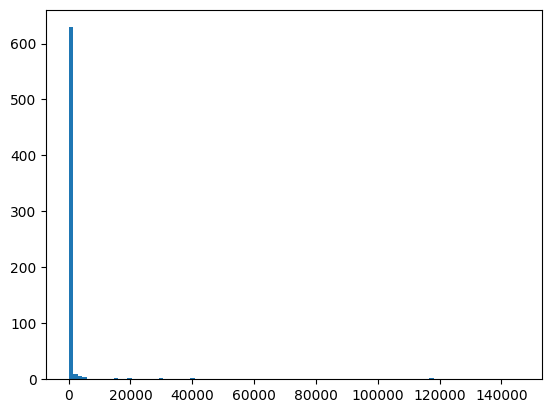

In [17]:
plt.hist(contins_df["mean"], bins=100)
plt.show()

Standart deviation value distribution

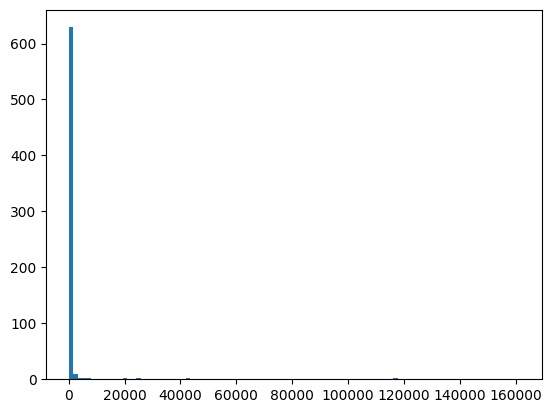

In [18]:
plt.hist(contins_df["std"], bins=100)
plt.show()

Min value distribution

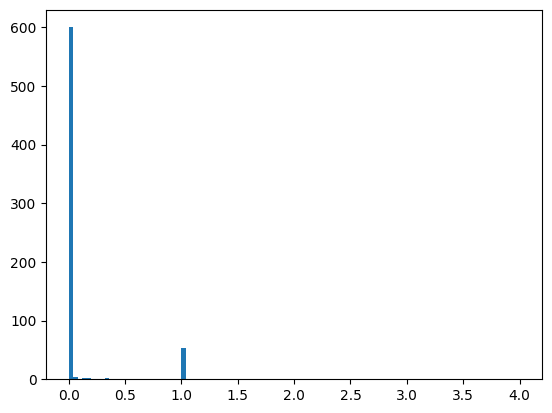

In [19]:
plt.hist(contins_df["min"], bins=100)
plt.show()

Max values distribution

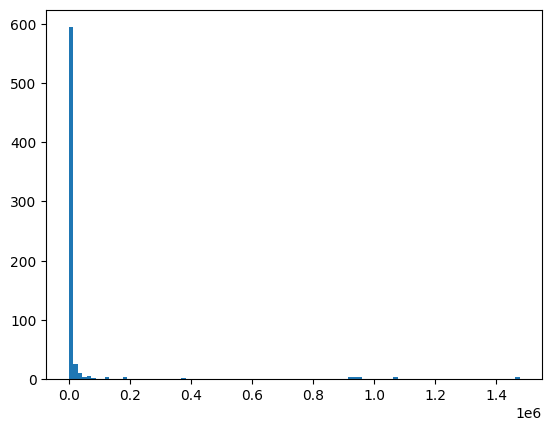

In [20]:
plt.hist(contins_df["max"], bins=100)
plt.show()

## Missing values analysis

In [21]:
def get_missing_values_count(df: pd.DataFrame, col: str) -> int:
    return df[col].isna().sum()

In [22]:
missing_values = {"name": [""] * COLS, "missing_count": [0] * COLS, "missing_persentage": [0] * COLS}

for index, col in enumerate(columns):
    count = get_missing_values_count(df, col)

    missing_values["name"][index] = col
    missing_values["missing_count"][index] = count
    missing_values["missing_persentage"][index] = count / ROWS
    

missing_df = pd.DataFrame.from_dict(missing_values)
missing_df


,name,missing_count,missing_persentage
0,target,0,0.000000
1,sample_type,0,0.000000
2,continuous_0,0,0.000000
3,categorical_0,0,0.000000
4,categorical_1,0,0.000000
...,...,...,...
682,continuous_665,15093,0.479173
683,continuous_666,15093,0.479173
684,categorical_15,10473,0.332497
685,categorical_16,15021,0.476887


In [23]:
full_columns = missing_df[missing_df["missing_count"] == 0]["name"].to_list()

print(f"Number of fully filled columns - {len(full_columns)}")

full_columns

Number of fully filled columns - 27


['target',
 'sample_type',
 'continuous_0',
 'categorical_0',
 'categorical_1',
 'categorical_2',
 'categorical_3',
 'categorical_4',
 'categorical_5',
 'categorical_6',
 'categorical_7',
 'categorical_8',
 'continuous_25',
 'continuous_475',
 'continuous_492',
 'continuous_493',
 'continuous_504',
 'continuous_505',
 'continuous_530',
 'continuous_531',
 'continuous_532',
 'continuous_533',
 'continuous_534',
 'continuous_537',
 'continuous_545',
 'continuous_588',
 'continuous_598']

### Truncated columns:

In [24]:
truncated_columns = missing_df[missing_df["missing_count"] != 0]["name"].to_list()

print(f"Number of truncated columns - {len(truncated_columns)}")

truncated_columns

Number of truncated columns - 660


['continuous_1',
 'continuous_2',
 'continuous_3',
 'continuous_4',
 'continuous_5',
 'continuous_6',
 'continuous_7',
 'continuous_8',
 'continuous_9',
 'continuous_10',
 'continuous_11',
 'continuous_12',
 'continuous_13',
 'continuous_14',
 'continuous_15',
 'continuous_16',
 'continuous_17',
 'continuous_18',
 'continuous_19',
 'continuous_20',
 'continuous_21',
 'continuous_22',
 'continuous_23',
 'continuous_24',
 'continuous_26',
 'continuous_27',
 'continuous_28',
 'continuous_29',
 'continuous_30',
 'continuous_31',
 'continuous_32',
 'continuous_33',
 'continuous_34',
 'continuous_35',
 'continuous_36',
 'continuous_37',
 'continuous_38',
 'continuous_39',
 'continuous_40',
 'continuous_41',
 'continuous_42',
 'continuous_43',
 'continuous_44',
 'continuous_45',
 'continuous_46',
 'continuous_47',
 'continuous_48',
 'continuous_49',
 'continuous_50',
 'continuous_51',
 'continuous_52',
 'continuous_53',
 'continuous_54',
 'continuous_55',
 'continuous_56',
 'continuous_57',
 

Missing value counts histogram

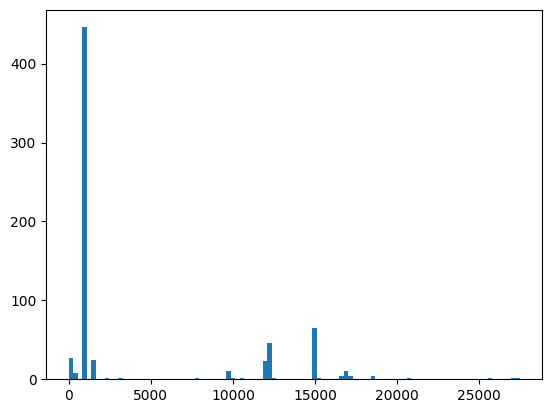

In [25]:
plt.hist(missing_df["missing_count"], bins=100)
plt.show()

Missing value percentage histogram

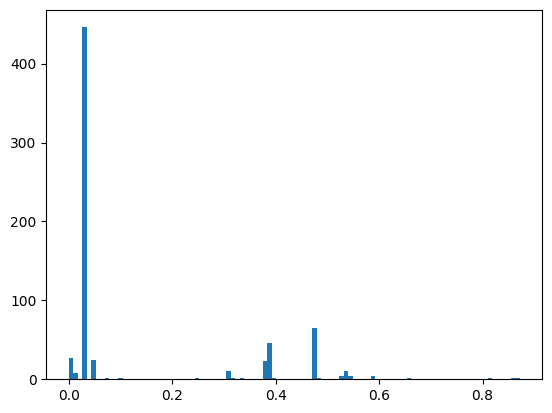

In [26]:
plt.hist(missing_df["missing_persentage"], bins=100)
plt.show()

### Mean and standart deviation of missing values part

In [27]:
mean_truncatance = missing_df["missing_persentage"].mean()
std_truncatance = missing_df["missing_persentage"].std()

print(f"Mean truncatance - {mean_truncatance: .2f} | Standart deviation - {std_truncatance: .2f}")

Mean truncatance -  0.14 | Standart deviation -  0.19


## Correlation with target

In [28]:
corr_df = df.drop("sample_type", axis=1)
corr_df["target"] = corr_df["target"].apply(lambda x: 1 if x == "good" else 0)
corr_df

,target,continuous_0,categorical_0,categorical_1,categorical_2,categorical_3,categorical_4,categorical_5,categorical_6,categorical_7,...,continuous_660,continuous_661,continuous_662,continuous_663,continuous_664,continuous_665,continuous_666,categorical_15,categorical_16,continuous_667
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,315.000000,315.00,315.00,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,155.000000,155.00,155.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,...,163.125000,162.15,164.10,0.0,0.0,0.0,0.0,1.0,1.0,NaN
3,1,1.0,1.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,...,107.226666,75.00,153.68,0.0,0.0,0.0,0.0,2.0,2.0,0.0
4,0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,157.150000,155.30,158.45,138.0,46.0,0.0,120.0,3.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31493,1,1.0,1.0,13.0,13.0,13.0,13.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,0.0
31494,1,1.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,...,140.000000,140.00,140.00,0.0,0.0,0.0,0.0,3.0,6.0,0.0
31495,1,1.0,1.0,17.0,17.0,17.0,17.0,3.0,3.0,3.0,...,78.333333,75.00,85.00,0.0,0.0,0.0,0.0,4.0,16.0,0.0
31496,1,1.0,1.0,14.0,14.0,14.0,14.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,0.0


In [29]:
target_correlation = corr_df.corr()["target"]
target_correlation = target_correlation.drop("target")
target_correlation

continuous_0      0.003200
categorical_0     0.028134
categorical_1    -0.023533
categorical_2    -0.021906
categorical_3    -0.025131
                    ...   
continuous_665   -0.047462
continuous_666   -0.065250
categorical_15   -0.036135
categorical_16   -0.009268
continuous_667    0.010410
Name: target, Length: 685, dtype: float64

In [30]:
most_positive_correlated = target_correlation.nlargest(100)
most_positive_correlated

continuous_602    0.155154
continuous_601    0.155097
continuous_469    0.148854
continuous_470    0.148809
continuous_473    0.118054
                    ...   
continuous_157    0.041777
continuous_7      0.041275
continuous_36     0.040194
continuous_499    0.039975
continuous_496    0.039975
Name: target, Length: 100, dtype: float64

In [31]:
most_negative_correlated = target_correlation.nsmallest(100)
most_negative_correlated

continuous_541   -0.088844
continuous_554   -0.078815
continuous_558   -0.077635
continuous_570   -0.071835
continuous_529   -0.069133
                    ...   
continuous_280   -0.030690
continuous_594   -0.030619
categorical_8    -0.030524
continuous_50    -0.030329
continuous_191   -0.029404
Name: target, Length: 100, dtype: float64

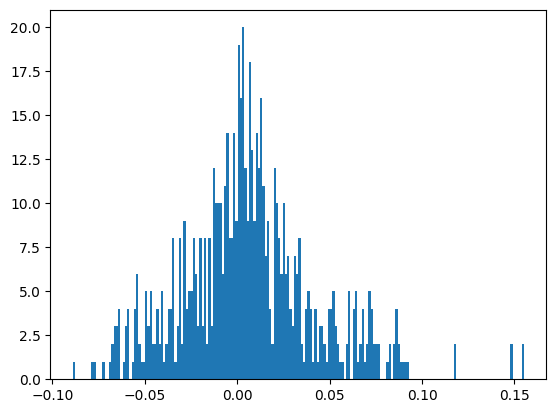

In [32]:
plt.hist(target_correlation, bins=200)
plt.show()